In [2]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
EPOCHS = 50
MAX_LEN = 50
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../Dataset/Updated_Dataset'
path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Binary/saved_models/{NAME}'

In [18]:
train_df = pd.read_csv(f'{dir}/train_data.csv')
val_df = pd.read_csv(f'{dir}/val_data.csv')
test_df = pd.read_csv(f'{dir}/test_data.csv')

train_texts = train_df['tweet'].values
val_texts = val_df['tweet'].values
test_texts = test_df['tweet'].values

train_labels = train_df['label'].values
val_labels = val_df['label'].values
test_labels = test_df['label'].values

In [19]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

the first batch of invitations to the power write course be go out now spring21 batch if you get an email from ben you be in 0
do not make me do the emotional labor of answer how be you 1
in politicalmedical news there be an impact stool in our body politic 0
there be no product in sf 0
dad look bianca it be the first time you dress up like an anime girl me die inside 0


In [20]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i])
    , train_labels[i])

first batch invitations power write course go spring21 batch get email ben 0
make emotional labor answer 1
politicalmedical news impact stool body politic 0
product sf 0
dad look bianca first time dress like anime girl die inside 0


In [21]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [22]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)
print(model)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [23]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 85/85 [00:38<00:00,  2.18it/s, loss=0.4]  


Train loss 0.42489691061132095 accuracy 0.8035417819590481
Validation loss 0.3616502175205632 accuracy 0.8313253012048193
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8313253012048193
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.28it/s, loss=0.281]


Train loss 0.2919010588351418 accuracy 0.880464858882125
Validation loss 0.3261779444782357 accuracy 0.8648881239242685
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8648881239242685
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.27it/s, loss=0.176] 


Train loss 0.20241558617528746 accuracy 0.9180962921970116
Validation loss 0.29088376070323746 accuracy 0.8924268502581756
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.8924268502581756
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.28it/s, loss=0.0592]


Train loss 0.15133522069629501 accuracy 0.9424460431654675
Validation loss 0.2936353808955142 accuracy 0.8950086058519794
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8950086058519794
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.26it/s, loss=0.0454]


Train loss 0.1203199914053959 accuracy 0.9516694336838221
Validation loss 0.3439844415376061 accuracy 0.8864027538726335
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 85/85 [00:36<00:00,  2.35it/s, loss=0.0302]


Train loss 0.10136608880232362 accuracy 0.9623685666851134
Validation loss 0.38252143218721213 accuracy 0.882960413080895
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 85/85 [00:38<00:00,  2.23it/s, loss=0.00862]


Train loss 0.050191402824266866 accuracy 0.9826600258254934
Validation loss 0.4279578516357823 accuracy 0.882960413080895
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 85/85 [00:36<00:00,  2.31it/s, loss=0.00331]


Train loss 0.02851900434368016 accuracy 0.9902232060505441
Validation loss 0.4663027987668389 accuracy 0.8907056798623064
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 85/85 [00:37<00:00,  2.29it/s, loss=0.00563]


Train loss 0.02149573719019399 accuracy 0.9929902232060505
Validation loss 0.580308472639636 accuracy 0.8855421686746988
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


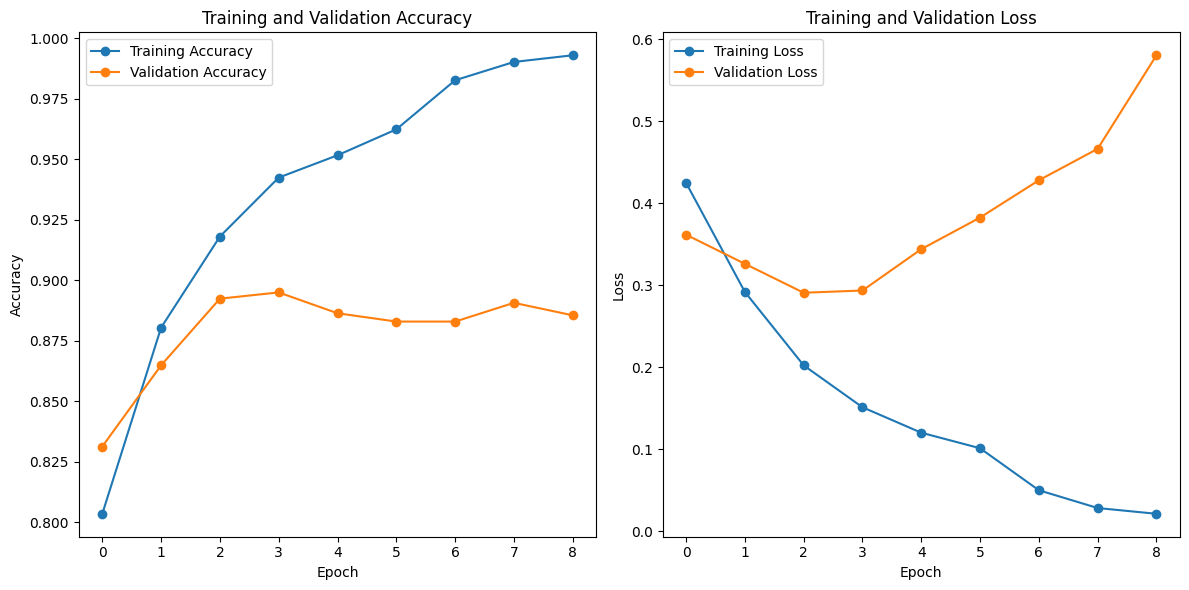

In [24]:
hlp.plot_history(history)

In [25]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Binary/saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [26]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9010327022375215 Test Loss: 0.26488656197723587


Accuracy: 0.9
F1 Score: 0.9
Precision: 0.9
Recall: 0.9

Classification Report:
                precision    recall  f1-score   support

Non-Depression       0.90      0.93      0.92       682
    Depression       0.90      0.86      0.88       480

      accuracy                           0.90      1162
     macro avg       0.90      0.90      0.90      1162
  weighted avg       0.90      0.90      0.90      1162



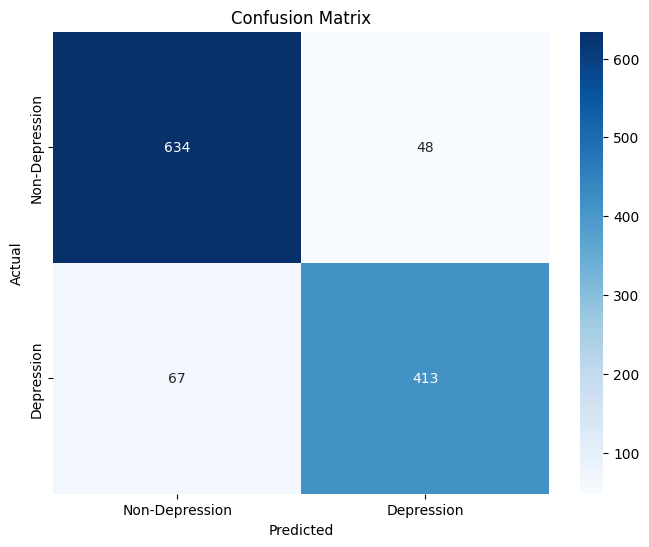

In [27]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Depression', 'Depression'])

In [28]:
test_texts = [
    "I feel so low and empty, life doesn't seem to have any purpose anymore.",
    "Had a great day at the park with friends, feeling really positive!"
]

preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

for i, text in enumerate(test_texts):
    if preds[i] == 1:
        print(f"Text: {text}\nPredicted class: Depression \nConfidence: {confidence[i][1]:.2f}\n")
    else:
        print(f"Text: {text}\nPredicted class: Normal \nConfidence: {confidence[i][0]:.2f}\n")

Text: I feel so low and empty, life doesn't seem to have any purpose anymore.
Predicted class: Depression 
Confidence: 0.99

Text: Had a great day at the park with friends, feeling really positive!
Predicted class: Depression 
Confidence: 0.93

